In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine(f"sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
    
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table

Measurement = Base.classes.measurement
Station = Base.classes.station


In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
#set inspector variable
inspector = inspect(engine)

In [10]:
# access columns and data types for Measurement

columns = inspector.get_columns('Measurement')
# columns

In [11]:
# print just column names for Measurement
for c in columns:
    print(c['name'])

id
station
date
prcp
tobs


In [12]:
# access columns and data types for Station
columns = inspector.get_columns('Station')
# columns

In [13]:
# print just column names for Station
for c in columns:
    print(c['name'])

id
station
name
latitude
longitude
elevation


In [14]:
# Find the most recent date in the data set.
max_date = session.query(func.max(Measurement.date)).all()
max_date

[('2017-08-23')]

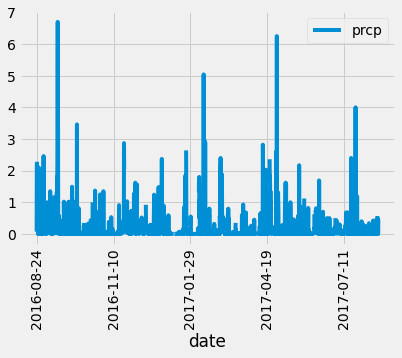

In [17]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.

query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
# print(query_date)

# Perform a query to retrieve the date and precipitation scores
twelve_months = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > query_date).\
    order_by(Measurement.date).all()
# twelve_months

# Save the query results as a Pandas DataFrame and set the index to the date column
twelve_months_df = pd.DataFrame(twelve_months)
# twelve_months_df

# Sort the dataframe by date
twelve_months_df = twelve_months_df.sort_values('date', ascending=True)
twelve_months_df
# Use Pandas Plotting with Matplotlib to plot the data
x_axis = twelve_months_df['date']
y_axis = twelve_months_df['prcp']

# plt.plot(x_axis, y_axis)
# plt.xlabel("Date")
# plt.ylabel("Precipitation")
# plt.show()

twelve_months_df.plot(x='date', y='prcp', rot='90')
plt.show()

In [18]:
# Use Pandas to calcualte the summary statistics for the precipitation data
summ_stats = twelve_months_df.describe()
summ_stats

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [19]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(func.count(Station.id)).all()
total_stations

[(9)]

In [20]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_frequency = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
station_frequency

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [21]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active = "USC00519281"
# most_active

# lowest temp (tobs)
lowest_temp = session.query(func.min(Measurement.tobs)).\
    filter(Measurement.station == most_active).all()
lowest_temp

[(54.0)]

In [22]:
# highest temp
highest_temp = session.query(func.max(Measurement.tobs)).\
    filter(Measurement.station == most_active).all()
highest_temp

[(85.0)]

In [23]:
# average temp
average_temp = session.query(func.avg(Measurement.tobs)).\
    filter(Measurement.station == most_active).all()
average_temp

[(71.66378066378067)]

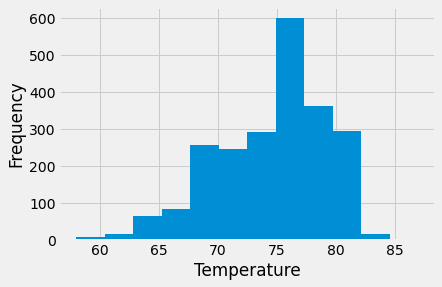

In [56]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_act_max_date = session.query(func.max(Measurement.date)).\
    filter(Measurement.station == most_active).all()
# most_act_max_date
most_act_query_date = dt.date(2017, 8, 18) - dt.timedelta(days=365)
# print(most_act_query_date)

most_act_twelve_months = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date > most_act_query_date).\
    order_by(Measurement.date).all()

most_act_sta_df = pd.DataFrame(most_act_twelve_months)
# most_act_sta_df

most_act_sta_df.hist(bins=12)
plt.title('')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

# Close session

In [57]:
# Close Session
session.close()